# Christmas recipes

* data set from kaggle: https://www.kaggle.com/gjbroughton/christmas-recipes
* This JSON lines file contains 1600 christmas cooking recipes scraped from BBC Good Food.
* The file contains:
    - Recipe Title
    - Recipe Description
    - Recipe Author
    - Ingredients list
    - Step by step method

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('christmas_recipes.json', lines=True) #without lines=True, I got ValueError: trailing data
df.head()

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [3]:
df.describe()

,Name,url,Description,Author,Ingredients,Method
count,1617,1617,1429,1611,1617,1617
unique,1608,1617,1428,93,1617,1617
top,Creamy bread & onion sauce,https://www.bbcgoodfood.com/recipes/2793/chris...,A perfect veggie main that goes brilliantly wi...,Good Food,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
freq,2,1,2,455,1,1


In [4]:
#check missing values

df.isnull().sum()

# There are 6 missing authors -> make a model to predict the author

Name             0
url              0
Description    188
Author           6
Ingredients      0
Method           0
dtype: int64

In [5]:
# display the rows with missing authors

df_noauthor = df[df['Author'].isnull()]
df_noauthor

,Name,url,Description,Author,Ingredients,Method
178,Eggnog,https://www.bbcgoodfood.com/recipes/eggnog,"Add cinnamon, and please please please don't s...",None,"[50g caster sugar, 4 egg yolks, 1 tsp vanilla ...",[Put the sugar in a saucepan with 75ml water. ...
195,"Sausage, sage & onion stuffing",https://www.bbcgoodfood.com/recipes/3056/sausa...,So easy to make and devine to eat. Had loads l...,None,"[2 onions, sliced, 25g butter, 1 small Bramley...","[Fry 2 sliced onions in 25g butter for 5 mins,..."
321,Pea & ham soup,https://www.bbcgoodfood.com/recipes/2806665/pe...,Cooked for lunch today using ham stock from th...,None,"[knob of butter, 1 onion, chopped, 1 medium po...",[Heat a knob of butter in a saucepan and when ...
386,Classic trifle,https://www.bbcgoodfood.com/recipes/155633/rub...,"I made this on Christmas eve, it was such a fa...",None,"[750g frozen summer fruit(raspberries, blackbe...",[Put 750g frozen summer fruit in a pan with 20...
468,Super-simple fruitcake,https://www.bbcgoodfood.com/recipes/super-simp...,The olive oil is wrong for this recipe; it has...,None,"[175ml olive oil, plus extra for greasing, 100...",[Heat oven to 160C/140C fan/ gas 3. Grease and...
784,Lamb & cranberry tagine,https://www.bbcgoodfood.com/recipes/lamb-cranb...,I halved the recipe but used a whole can of to...,None,"[1½ kg lamb shoulder, trimmed of excess fat, t...","[At least 3 hrs before (or preferably a day), ..."


In [6]:
df_train = df[df['Author'].notna()]
df_train.tail()

,Name,url,Description,Author,Ingredients,Method
1612,Flavoured butters,https://www.bbcgoodfood.com/recipes/1911/flavo...,Try these different flavoured butters melted o...,Maxine Clark,"[100g softened butter, 2-3 tbsp chopped fresh ...",[Take100g/4oz softened butter and beat until c...
1613,Crispy Roast Duck,https://www.bbcgoodfood.com/recipes/3248/crisp...,"Duck basted to perfection, ideal for a Sunday ...",Ruth Watson,"[3 medium-sized duckss (each about 2¼kg/5lb), ...",[Remove the duck’s giblets and wash them. Cut ...
1614,Smoked salmon kedgeree,https://www.bbcgoodfood.com/recipes/3047/smoke...,This kedgeree is totally delicious. Treat ever...,Barney Desmazery,"[300g basmati rice, 8 eggs, 400g pack sliced s...","[To make the sauce, heat the butter in a large..."
1615,Spicy potted crab,https://www.bbcgoodfood.com/recipes/1797/spicy...,An ideal elegant starter for a wedding,Merrilees Parker,"[6 x 250g pkts unsalted butter, 2 tsp hot chil...",[ Heat the butter in a pan until melted. Turn ...
1616,Sage and Onion Sauce,https://www.bbcgoodfood.com/recipes/3250/sage-...,A great accompaniment to roast duck that can b...,Ruth Watson,"[all the innards, wings and bones from the duc...",[Preheat the oven to 230C/Gas 8/fan oven 210C....


In [7]:
# check data of one missing author by index

# df_train.loc[178] # KeyError: 178
df_train.loc[179]

Name                                            Rocky robin cake
url            https://www.bbcgoodfood.com/recipes/889664/roc...
Description    Get creative with your Christmas cake icing - ...
Author                                                Sarah Cook
Ingredients    [1 x 20cm round or 18cm square Christmas cake(...
Method         [Sit the cake on a large board or flat serving...
Name: 179, dtype: object

<AxesSubplot:>

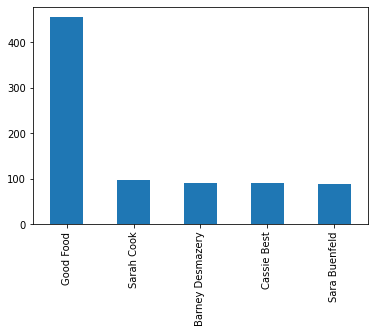

In [10]:
# plot top 5 authors

df_train['Author'].value_counts()[:5].plot(kind='bar')

## Text pre-processing

## Models

In [ ]:
df_train_X = df_train[['Name','Description','Method']]
df_train_y = df_train['Author']

In [ ]:
tfv = TfidfVectorizer()
X_tfv = tfv.fit_transform(X)
X_vec = pd.DataFrame(X_tfv.todense(), columns=tfv.get_feature_names())

mnb = MultinomialNB()
mnb.fit(X_vec, y)
mnb_score = mnb.score(X_vec, y)

text_trans = tfv.transform(text)
text_vector = pd.DataFrame(text_trans.todense(), columns=tfv.get_feature_names())
mnb_pred = mnb.predict(text_vector)
mnb_pred[0]